# Hotspot propensity panels Fig 2C-F

In [1]:
from collections import defaultdict
import re 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
from scipy.stats import iqr as iqr

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
data_dir = './data'

In [4]:
sigs_color = {
 'SBS1': '#1e79baff',
 'SBS10c': '#8d8d8dff',
 'SBS12': '#b88100ff',
 'SBS13': '#d62728ff',
 'SBS16': '#e2ef75ff',
 'SBS17a': '#ffbb78ff',
 'SBS17b': '#ff8921ff',
 'SBS18': '#9467bdff',
 'SBS2': '#ff9896ff',
 'SBS3': '#f6c200ff',
 'SBS35': '#a4e6a4ff',
 'SBS4': '#00a572ff',
 'SBS40': '#afd6f2ff',
 'SBS41': '#cd99ceff',
 'SBS5': '#7ebdeaff',
 'SBS7a': '#8c564bff',
 'SBS7b': '#c49c94ff',
 'SBS8': '#3dbe3dff',
 'SBS85': '#db5a68ff',
 'SBS88': '#b96a33ff',
 'SBS92': '#94e5cdff',
 'SBS93': '#c5b0d5ff',
 'SBS94': '#ffe680ff', 
 'Other': '#d5d5d5ff',
}

In [5]:
mutations_cutoffs = [100, 125, 150, 175, 200, 225, 250, 275, 300]

### Load data

This table contains the hotspot propensity calculations using 100 samples and 100-300 mutations per sample for 1000 iterations

In [6]:
input_f = f'{data_dir}/hotspot_propensity_1000iter_100samples_100-300muts.txt.gz'

In [7]:
df = pd.read_csv(input_f, sep='\t', header=0)
df.head()

,ITER,N_SAMPLES,TOTAL_HOTSPOTS,TOTAL_HOTSPOTS_UNIQPOS,TOTAL_MUTS,CTYPE,SIGNATURE
0,BLADDER_URI_iter_0_SBS2,100,0,0,10000,BLADDER_URI,SBS2
1,BLADDER_URI_iter_1_SBS2,100,1,1,10000,BLADDER_URI,SBS2
2,BLADDER_URI_iter_2_SBS2,100,0,0,10000,BLADDER_URI,SBS2
3,BLADDER_URI_iter_3_SBS2,100,2,2,10000,BLADDER_URI,SBS2
4,BLADDER_URI_iter_4_SBS2,100,2,2,10000,BLADDER_URI,SBS2


In [8]:
len(df)

279000

## Panel 2C

In [9]:
# Use only simulations with 300 mutations per sample across 100 samples (= 30000 total mutations)
subset = df.loc[df['TOTAL_MUTS'] == 30000].copy()
subset.sort_values(by='TOTAL_HOTSPOTS_UNIQPOS', ascending=False, inplace=True)
subset.head()

,ITER,N_SAMPLES,TOTAL_HOTSPOTS,TOTAL_HOTSPOTS_UNIQPOS,TOTAL_MUTS,CTYPE,SIGNATURE
259640,COADREAD_iter_640_SBS17b,100,129,129,30000,COADREAD,SBS17b
259565,COADREAD_iter_565_SBS17b,100,120,120,30000,COADREAD,SBS17b
259916,COADREAD_iter_916_SBS17b,100,119,119,30000,COADREAD,SBS17b
259824,COADREAD_iter_824_SBS17b,100,119,119,30000,COADREAD,SBS17b
259425,COADREAD_iter_425_SBS17b,100,119,119,30000,COADREAD,SBS17b


In [10]:
len(subset)

31000

In [11]:
data_to_plot = dict()
data_to_sort = dict()
points = dict()
for signature, data in subset.groupby('SIGNATURE'):
    for ctype, ctype_data in data.groupby('CTYPE'): 
        identifier = f'{signature}_{ctype}'
        median = np.median(ctype_data['TOTAL_HOTSPOTS_UNIQPOS'])
        data_to_sort[identifier] = np.mean(ctype_data['TOTAL_HOTSPOTS_UNIQPOS'])
        iq_range = iqr(ctype_data['TOTAL_HOTSPOTS_UNIQPOS'])
        data_to_plot[identifier] = median
        points[identifier] = ctype_data['TOTAL_HOTSPOTS_UNIQPOS'].tolist()

In [12]:
# Sort by mean number of hotspots
sorted_sigs = dict(sorted(data_to_sort.items(), key=lambda x: x[1], reverse=True))
sorted_sigs

{'SBS17b_COADREAD': 88.896,
 'SBS17a_COADREAD': 80.554,
 'SBS17b_ESOPHA_STOMACH': 69.335,
 'SBS17a_ESOPHA_STOMACH': 62.553,
 'SBS1_PROSTATE': 49.135,
 'SBS1_ESOPHA_STOMACH': 39.572,
 'SBS1_BLADDER_URI': 38.977,
 'SBS1_COADREAD': 38.397,
 'SBS1_BRCA': 36.08,
 'SBS1_NSCLC': 35.052,
 'SBS7a_SKCM': 7.443,
 'SBS18_COADREAD': 6.815,
 'SBS2_BLADDER_URI': 6.808,
 'SBS8_PROSTATE': 6.218,
 'SBS93_COADREAD': 6.196,
 'SBS2_BRCA': 6.083,
 'SBS2_NSCLC': 4.903,
 'SBS13_NSCLC': 3.96,
 'SBS13_BRCA': 3.8,
 'SBS7b_SKCM': 3.718,
 'SBS13_BLADDER_URI': 3.404,
 'SBS5_BRCA': 3.202,
 'SBS5_PROSTATE': 2.772,
 'SBS5_BLADDER_URI': 2.16,
 'SBS5_COADREAD': 2.155,
 'SBS40_COADREAD': 1.949,
 'SBS3_BRCA': 1.298,
 'SBS5_ESOPHA_STOMACH': 1.055,
 'SBS4_NSCLC': 1.039,
 'SBS5_NSCLC': 0.953,
 'SBS40_NSCLC': 0.537}

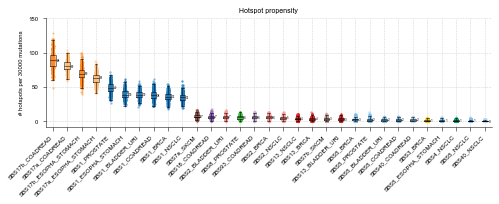

In [13]:
plt.rc('axes', edgecolor='black', linewidth=0.5)
fig = plt.figure(figsize=(8, 2))
ax = plt.subplot2grid((1, 1), (0, 0))
sorted_sigs = dict(sorted(data_to_sort.items(), key=lambda x: x[1], reverse=True))

plt.title('Hotspot propensity', fontsize=7)

for i, signature_ctype in enumerate(sorted_sigs): 
    signature = signature_ctype.split('_')[0]
    hotspots = points[signature_ctype]
    boxstyle = dict(linewidth=0.5, color='black')
    ax.boxplot(hotspots, positions=[i], widths=0.4, medianprops=boxstyle, boxprops=boxstyle, whiskerprops=boxstyle, capprops=boxstyle, showfliers=False)   
    ax.scatter(np.random.normal(i, scale=0.025, size=len(hotspots)), hotspots, color=sigs_color[signature], s=5, linewidth=0, alpha=0.5)
    ax.text(i + 0.25, np.median(hotspots), int(np.median(hotspots)), fontsize=3, va='center')

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
xticks = list(range(len(sorted_sigs)))
ax.set_xticks(xticks)
ax.set_xticklabels(sorted_sigs, fontsize=6, rotation=45, ha='right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.tick_params(width=0.5)

ax.set_ylabel('# hotspots per 30000 mutations', fontsize=6)
ax.set_xlabel('', fontsize=6)
ax.set_axisbelow(True)
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5, zorder=0)

for extension in ['png']: 
    output = f'./fig_2C.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

## Panels 2D and 2E

In [14]:
data_to_plot = defaultdict(dict)
for signature, data in df.groupby('SIGNATURE'): 
    print(signature, data['CTYPE'].unique())
    for mutburden, mdata in data.groupby('TOTAL_MUTS'): 
        median = np.median(mdata['TOTAL_HOTSPOTS_UNIQPOS'])
        iq_range = iqr(mdata['TOTAL_HOTSPOTS_UNIQPOS'])
        data_to_plot[signature][mutburden] = (median, median-iq_range, median+iq_range)

SBS1 ['BLADDER_URI' 'BRCA' 'COADREAD' 'ESOPHA_STOMACH' 'NSCLC' 'PROSTATE']
SBS13 ['BLADDER_URI' 'BRCA' 'NSCLC']
SBS17a ['COADREAD' 'ESOPHA_STOMACH']
SBS17b ['COADREAD' 'ESOPHA_STOMACH']
SBS18 ['COADREAD']
SBS2 ['BLADDER_URI' 'BRCA' 'NSCLC']
SBS3 ['BRCA']
SBS4 ['NSCLC']
SBS40 ['COADREAD' 'NSCLC']
SBS5 ['BLADDER_URI' 'BRCA' 'COADREAD' 'ESOPHA_STOMACH' 'NSCLC' 'PROSTATE']
SBS7a ['SKCM']
SBS7b ['SKCM']
SBS8 ['PROSTATE']
SBS93 ['COADREAD']


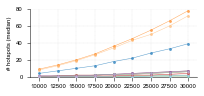

In [15]:
fig = plt.figure(figsize=(3, 1.25))
ax = plt.subplot2grid((1, 1), (0, 0))

sigs_under_analysis = list(df['SIGNATURE'].unique())
sorted_sigs = list(zip(*sorted(list(zip(list(map(lambda x: int(re.findall('[0-9]+', x)[0]), sigs_under_analysis)), sigs_under_analysis)), key=lambda tup: tup[0])))[-1]

# Break y axis
ax.set_ylim(0, 80)  

total_muts = [100 * mc for mc in mutations_cutoffs]
for signature in sorted_sigs: 
    total_y = []
    for muts in total_muts: 
        xdata = muts
        y = data_to_plot[signature][muts][0]
        total_y += [y]
        ax.scatter(xdata, y, color=sigs_color[signature], marker='o', s=8, lw=0, alpha=0.75, zorder=3)
    ax.plot(total_muts, total_y, '-', color=sigs_color[signature], lw=0.5, alpha=0.75)
    
ax.set_xticks(total_muts)
ax.set_xticklabels(total_muts, rotation=0, fontsize=6, horizontalalignment='center')
yticklabels = [0, 20, 40, 60, 80]
ax.set_yticks(yticklabels)
ax.set_yticklabels(yticklabels, fontsize=6)
ax.set_ylabel('# hotspots (median)', fontsize=6)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.tick_params(width=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='lightgrey', linestyle='--', linewidth=0.25, zorder=0)

for extension in ['png']: 
    output = f'./fig_2D.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

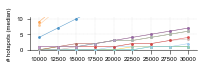

In [16]:
fig = plt.figure(figsize=(3, 0.6))
ax = plt.subplot2grid((1, 1), (0, 0))

sigs_under_analysis = list(df['SIGNATURE'].unique())
sorted_sigs = list(zip(*sorted(list(zip(list(map(lambda x: int(re.findall('[0-9]+', x)[0]), sigs_under_analysis)), sigs_under_analysis)), key=lambda tup: tup[0])))[-1]

# Break y axis
ax.set_ylim(0, 10.5)  

total_muts = [100 * mc for mc in mutations_cutoffs]
for signature in sorted_sigs: 
    total_y = []
    for muts in total_muts: 
        xdata = muts
        y = data_to_plot[signature][muts][0]
        total_y += [y]
        ax.scatter(xdata, y, color=sigs_color[signature], marker='o', s=8, lw=0, alpha=0.75, zorder=3)
    ax.plot(total_muts, total_y, '-', color=sigs_color[signature], lw=0.5, alpha=0.75)
    
ax.set_xticks(total_muts)
ax.set_xticklabels(total_muts, rotation=0, fontsize=6, horizontalalignment='center')
yticklabels = [0, 5, 10]
ax.set_yticks(yticklabels)
ax.set_yticklabels(yticklabels, fontsize=6)
ax.set_ylabel('# hotspots (median)', fontsize=6)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.tick_params(width=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='lightgrey', linestyle='--', linewidth=0.25, zorder=0)

for extension in ['png']: 
    output = f'./fig_2E.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

## Panel 2F

In [17]:
# Use only simulations with 300 mutations per sample across 100 samples (= 30000 total mutations)
subset = df.loc[df['TOTAL_MUTS'] == 30000].copy()
subset.sort_values(by='TOTAL_HOTSPOTS_UNIQPOS', ascending=False, inplace=True)
subset.head()

,ITER,N_SAMPLES,TOTAL_HOTSPOTS,TOTAL_HOTSPOTS_UNIQPOS,TOTAL_MUTS,CTYPE,SIGNATURE
259640,COADREAD_iter_640_SBS17b,100,129,129,30000,COADREAD,SBS17b
259565,COADREAD_iter_565_SBS17b,100,120,120,30000,COADREAD,SBS17b
259916,COADREAD_iter_916_SBS17b,100,119,119,30000,COADREAD,SBS17b
259824,COADREAD_iter_824_SBS17b,100,119,119,30000,COADREAD,SBS17b
259425,COADREAD_iter_425_SBS17b,100,119,119,30000,COADREAD,SBS17b


In [18]:
len(subset)

31000

In [19]:
data_to_plot = dict()
data_to_sort = dict()
points = dict()
for signature, data in subset.groupby('SIGNATURE'): 
    median = np.median(data['TOTAL_HOTSPOTS_UNIQPOS'])
    data_to_sort[signature] = np.mean(data['TOTAL_HOTSPOTS_UNIQPOS'])
    iq_range = iqr(data['TOTAL_HOTSPOTS_UNIQPOS'])
    data_to_plot[signature] = median
    points[signature] = data['TOTAL_HOTSPOTS_UNIQPOS'].tolist()

In [20]:
# Sort by mean number of hotspots
sorted_sigs = dict(sorted(data_to_sort.items(), key=lambda x: x[1], reverse=True))
sorted_sigs

{'SBS17b': 79.1155,
 'SBS17a': 71.5535,
 'SBS1': 39.5355,
 'SBS7a': 7.443,
 'SBS18': 6.815,
 'SBS8': 6.218,
 'SBS93': 6.196,
 'SBS2': 5.931333333333333,
 'SBS13': 3.7213333333333334,
 'SBS7b': 3.718,
 'SBS5': 2.0495,
 'SBS3': 1.298,
 'SBS40': 1.243,
 'SBS4': 1.039}

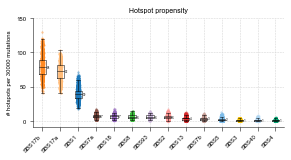

In [21]:
fig = plt.figure(figsize=(4.5, 2))
ax = plt.subplot2grid((1, 1), (0, 0))
sorted_sigs = dict(sorted(data_to_sort.items(), key=lambda x: x[1], reverse=True))

plt.title('Hotspot propensity', fontsize=7)

for i, signature in enumerate(sorted_sigs): 
    hotspots = points[signature]
    boxstyle = dict(linewidth=0.5, color='black')
    ax.boxplot(hotspots, positions=[i], widths=0.4, medianprops=boxstyle, boxprops=boxstyle, whiskerprops=boxstyle, capprops=boxstyle, showfliers=False)   
    ax.scatter(np.random.normal(i, scale=0.025, size=len(hotspots)), hotspots, color=sigs_color[signature], s=5, linewidth=0, alpha=0.5)
    ax.text(i + 0.25, np.median(hotspots), int(np.median(hotspots)), fontsize=3, va='center')

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
xticks = list(range(len(sorted_sigs)))
ax.set_xticks(xticks)
ax.set_xticklabels(sorted_sigs, fontsize=6, rotation=45, ha='right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.tick_params(width=0.5)

ax.set_ylabel('# hotspots per 30000 mutations', fontsize=6)
ax.set_xlabel('', fontsize=6)
ax.set_axisbelow(True)
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5, zorder=0)

for extension in ['png']: 
    output = f'./fig_2F.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)